In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import scipy as scp
import scipy.linalg
from scipy.sparse.linalg import inv
%matplotlib notebook


## Theory and Derivations

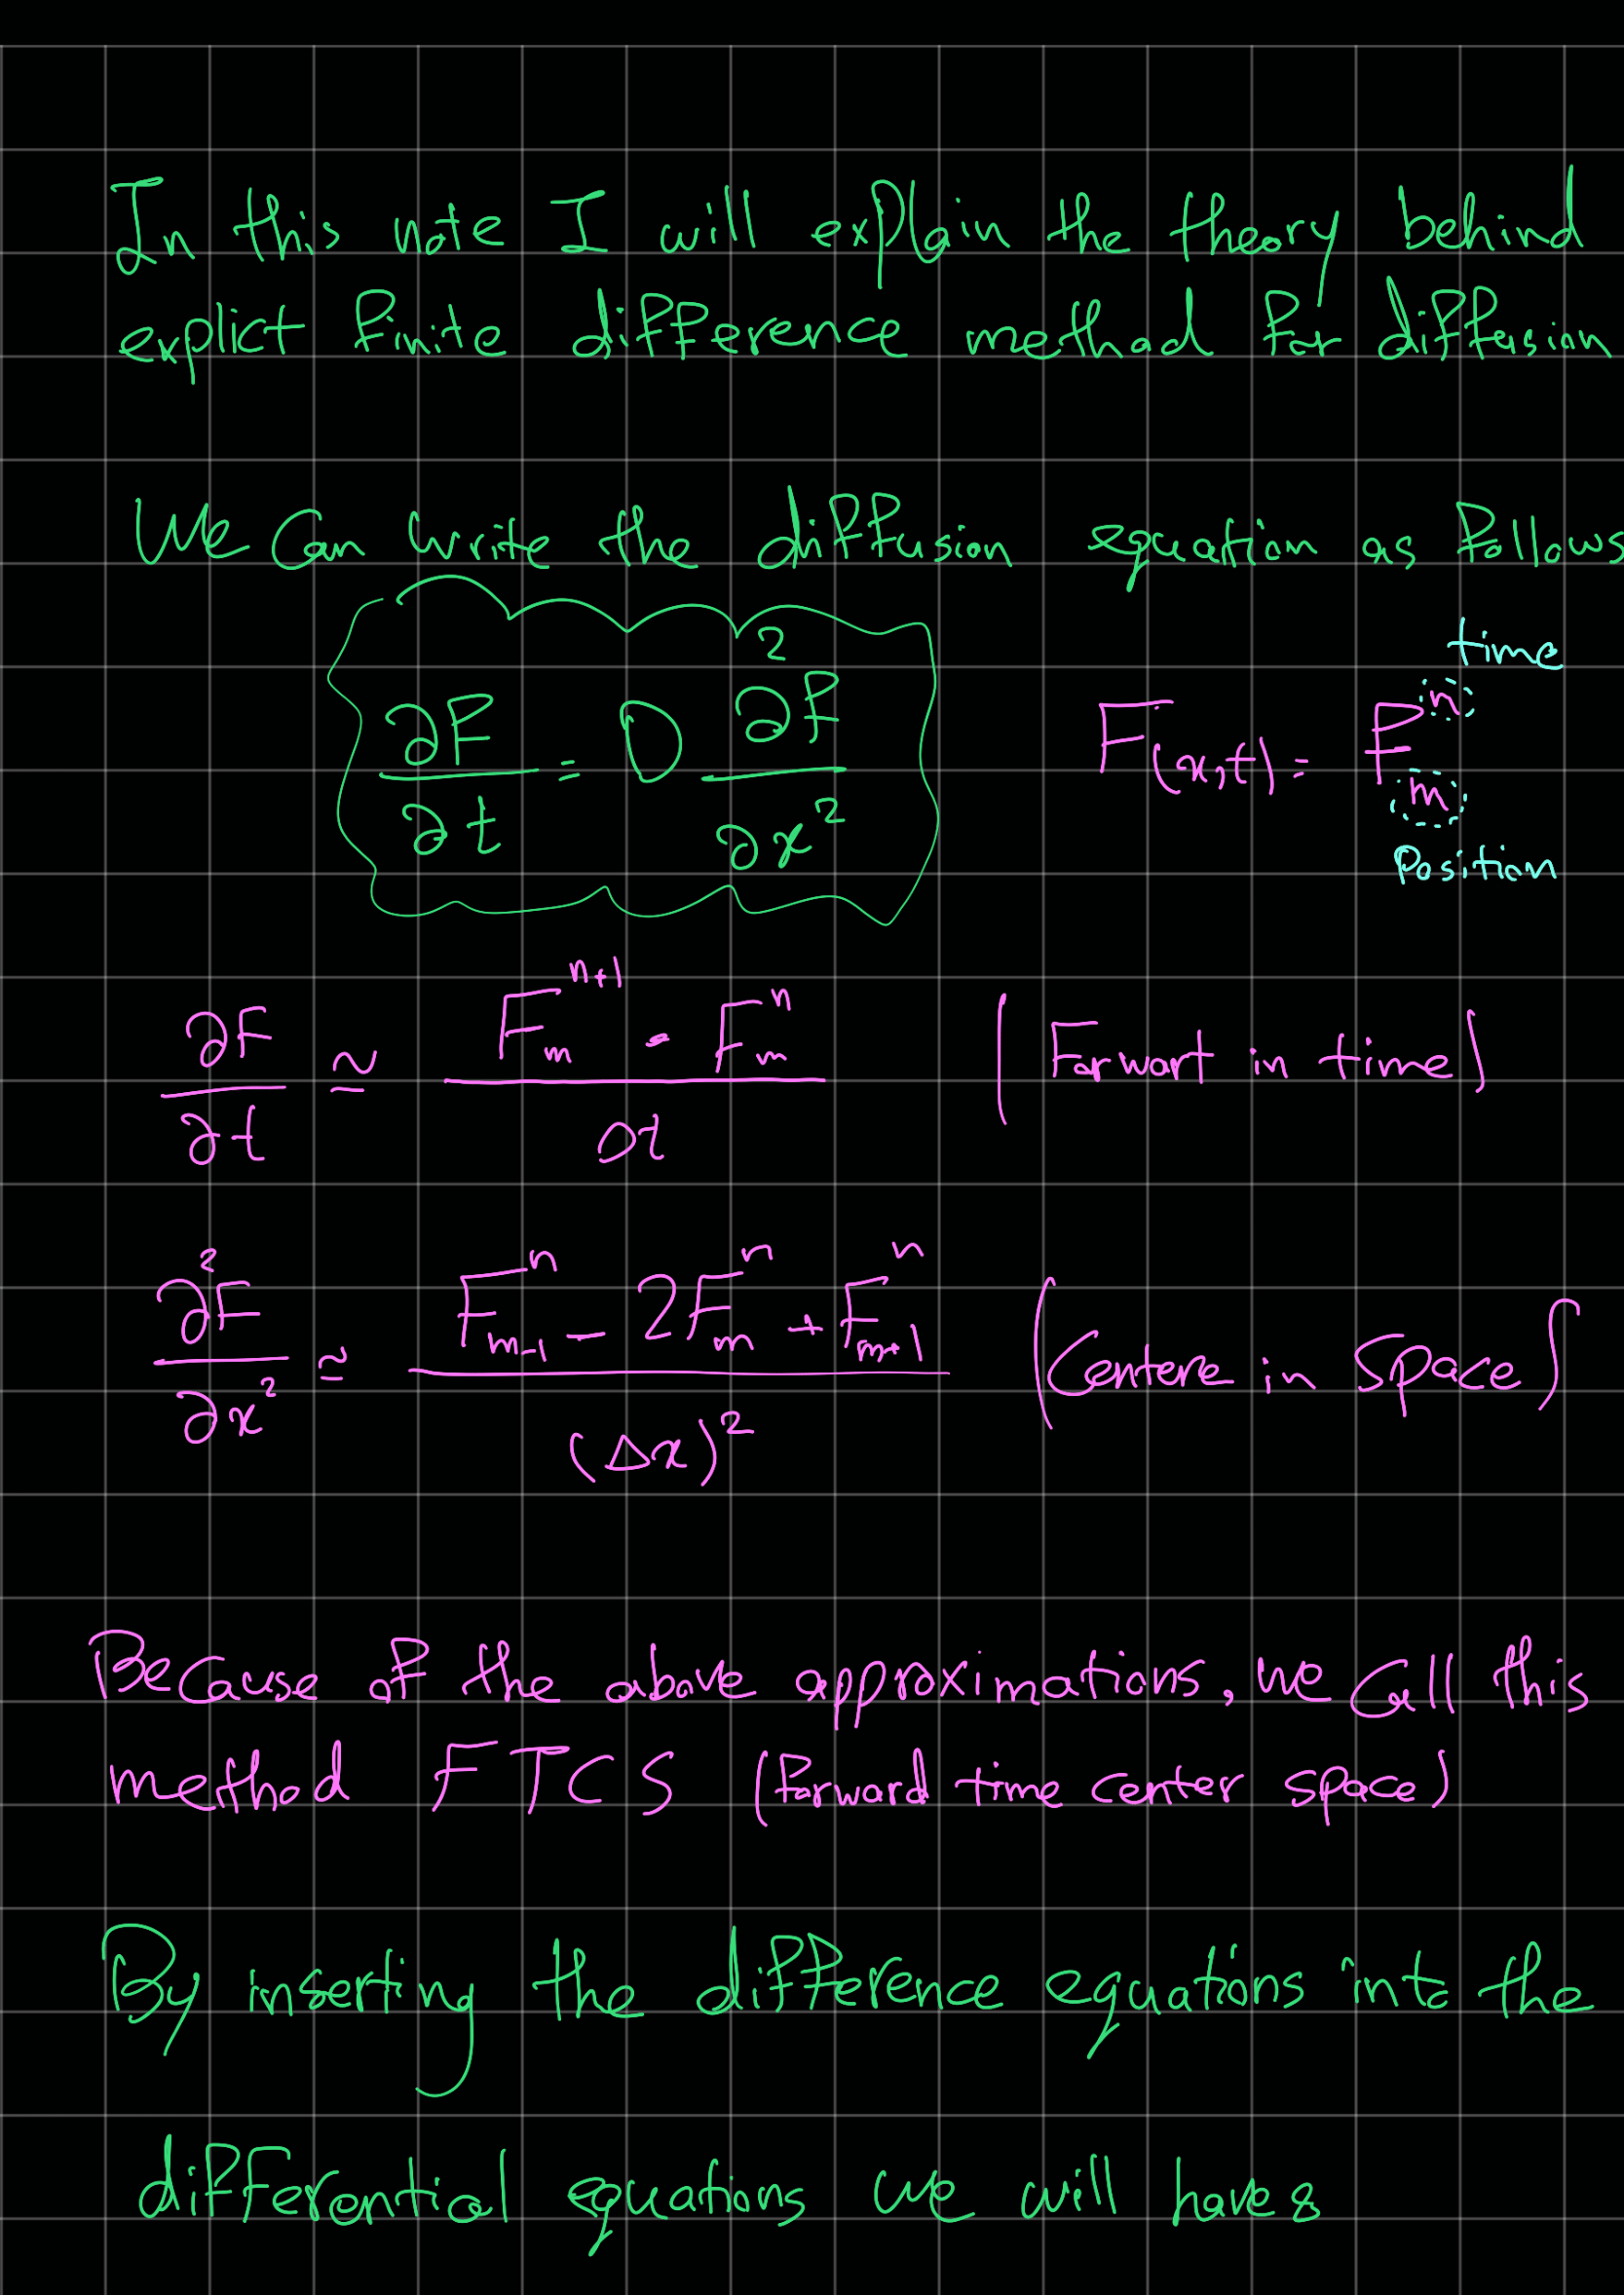

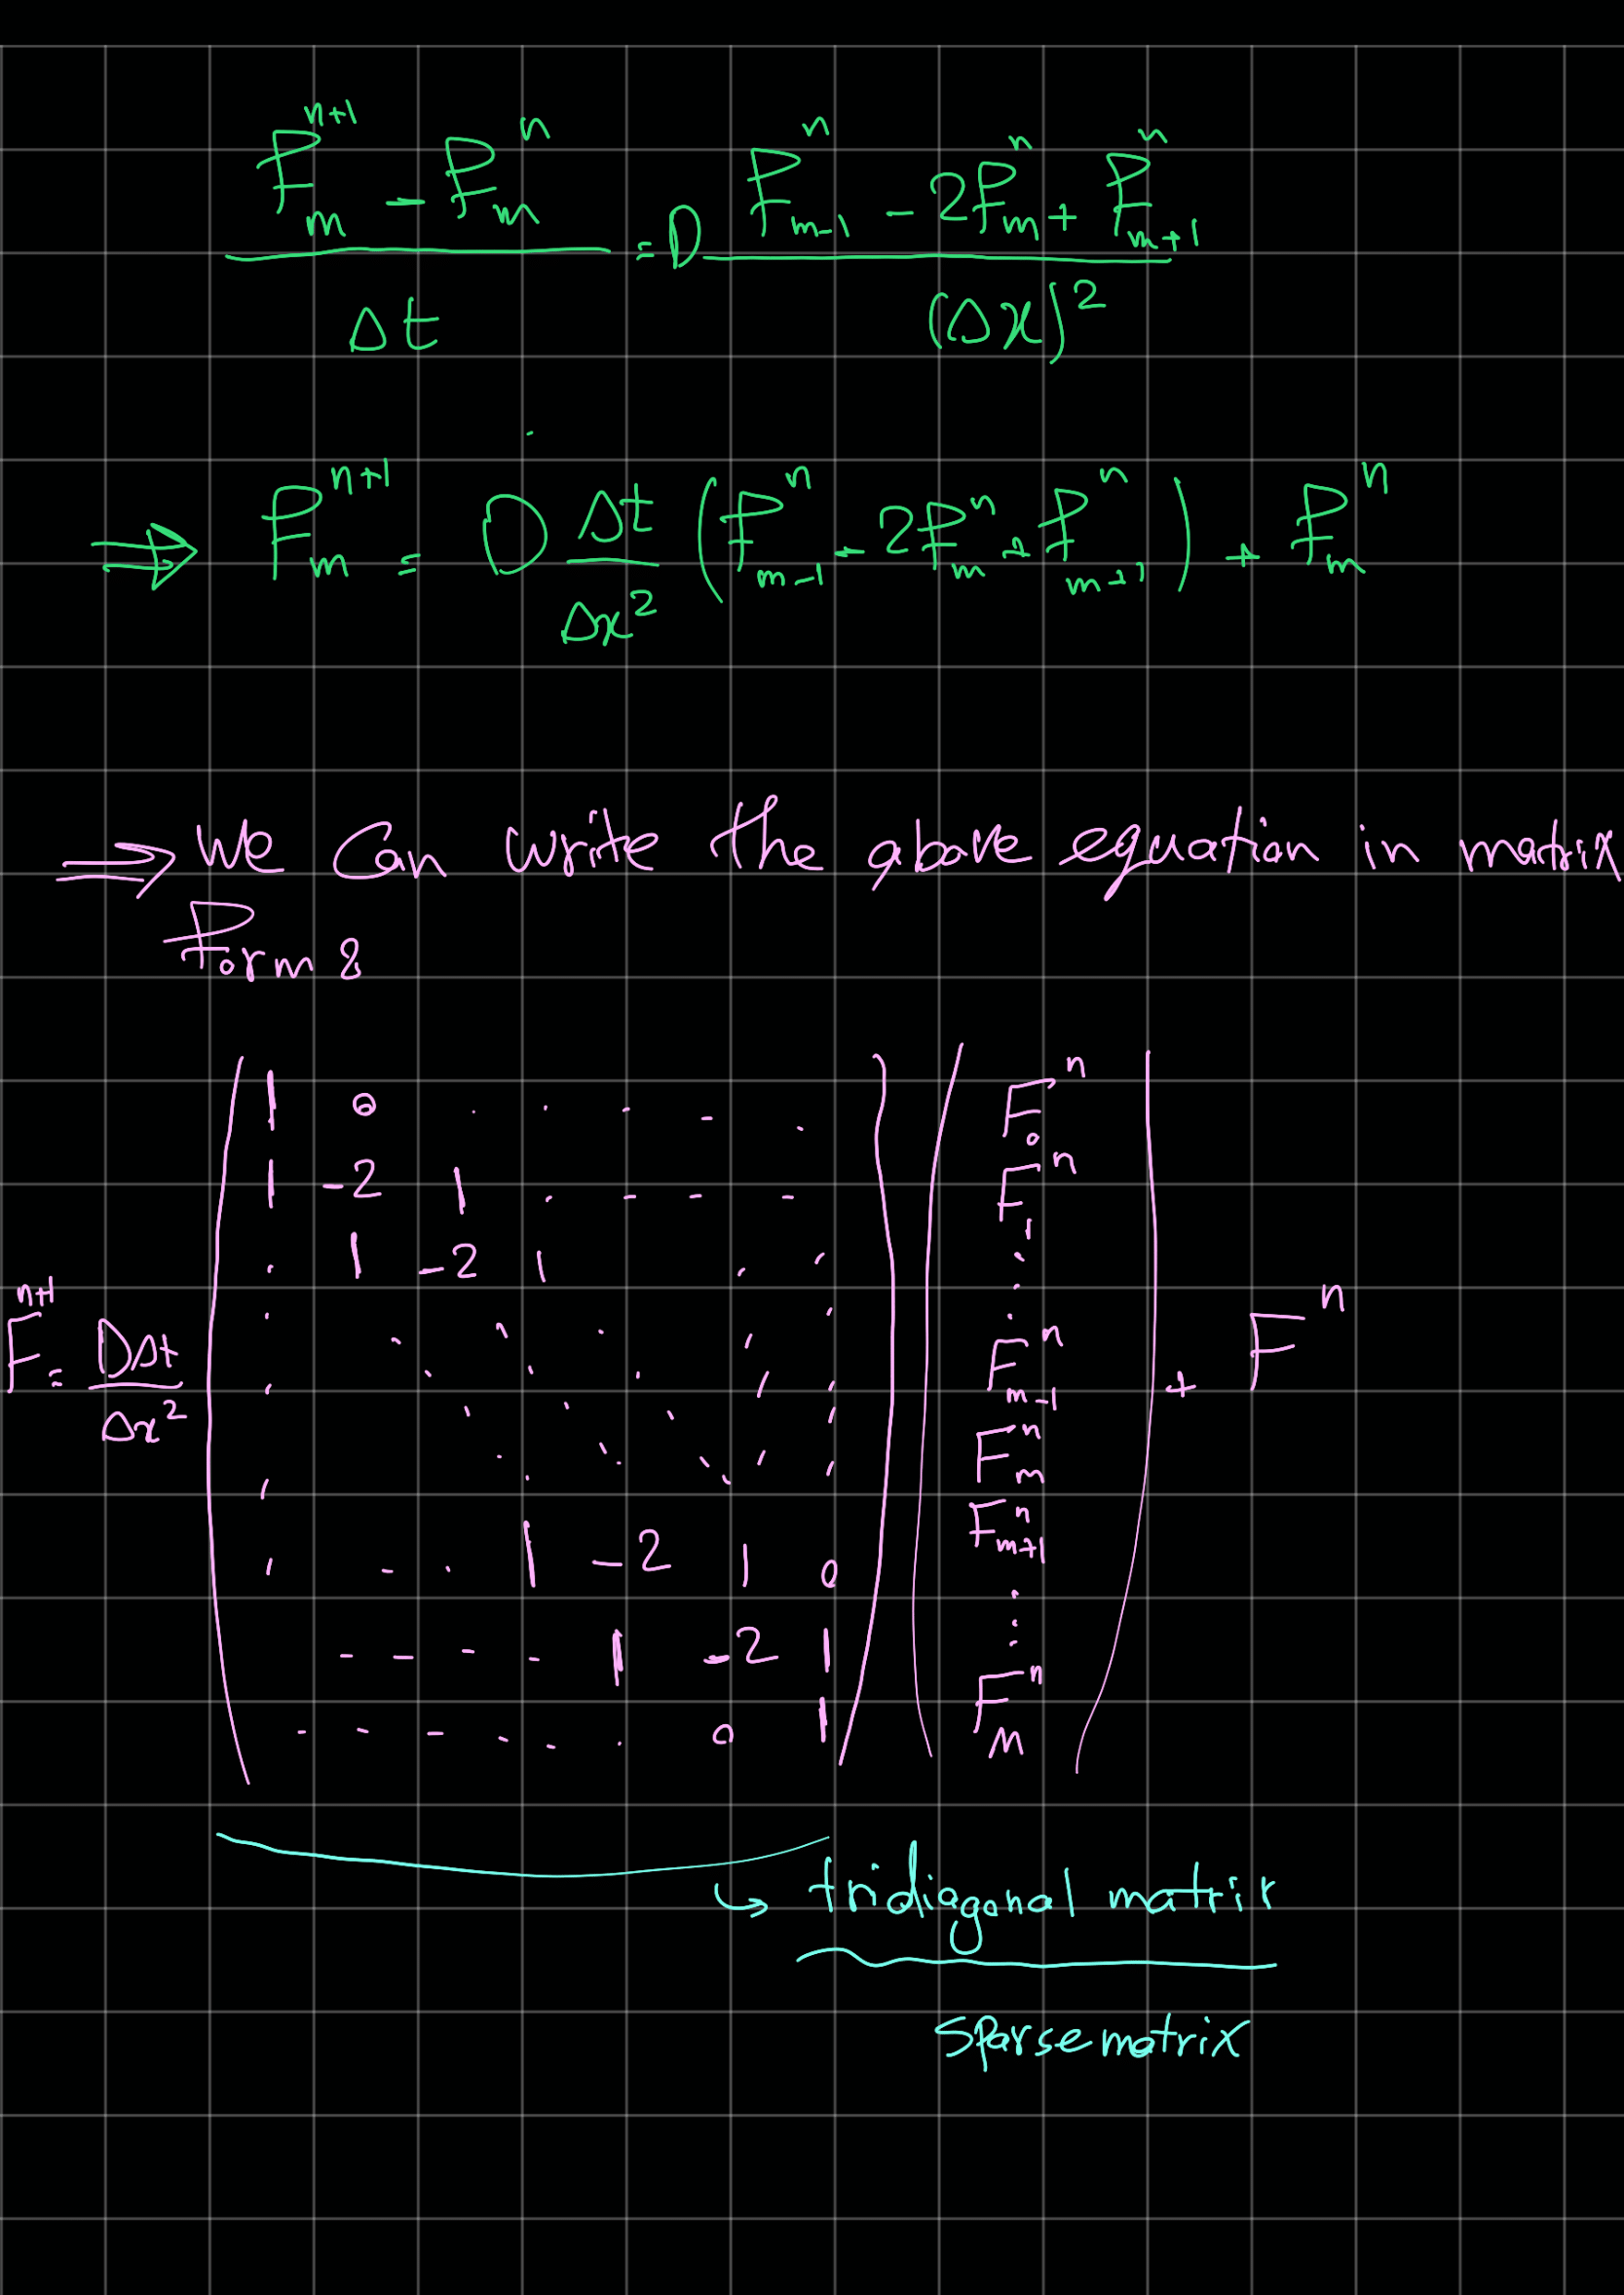

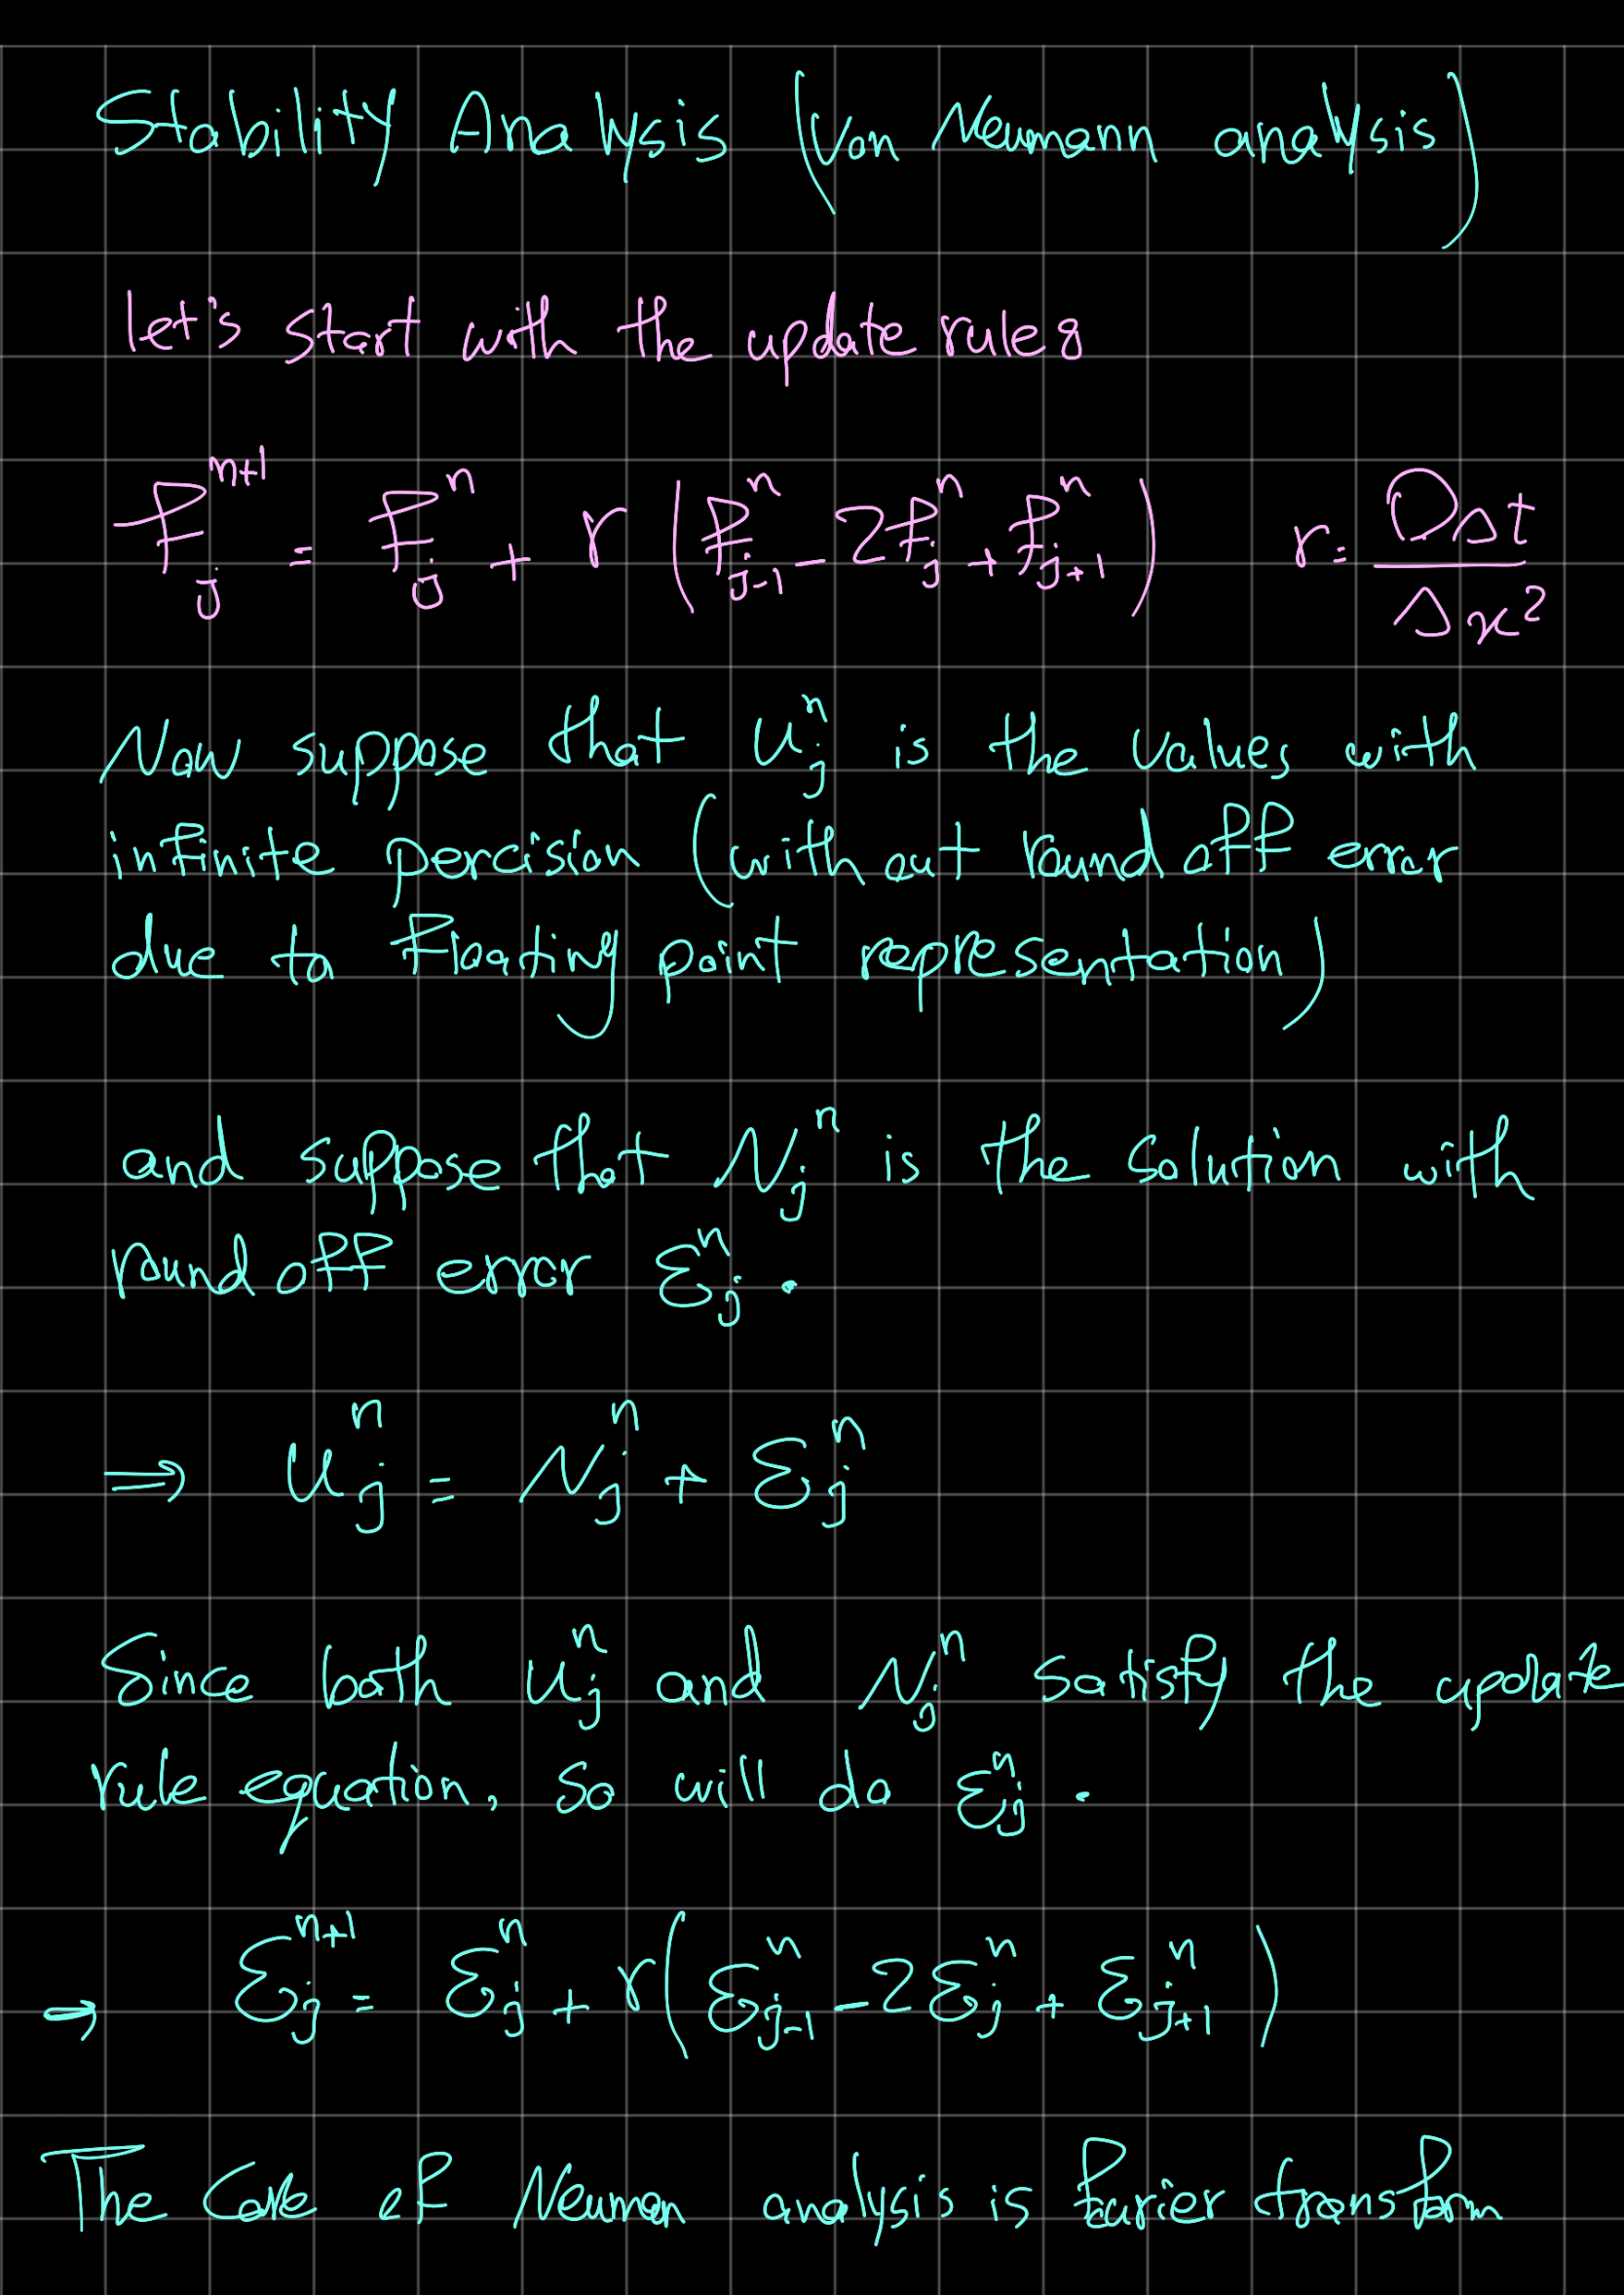

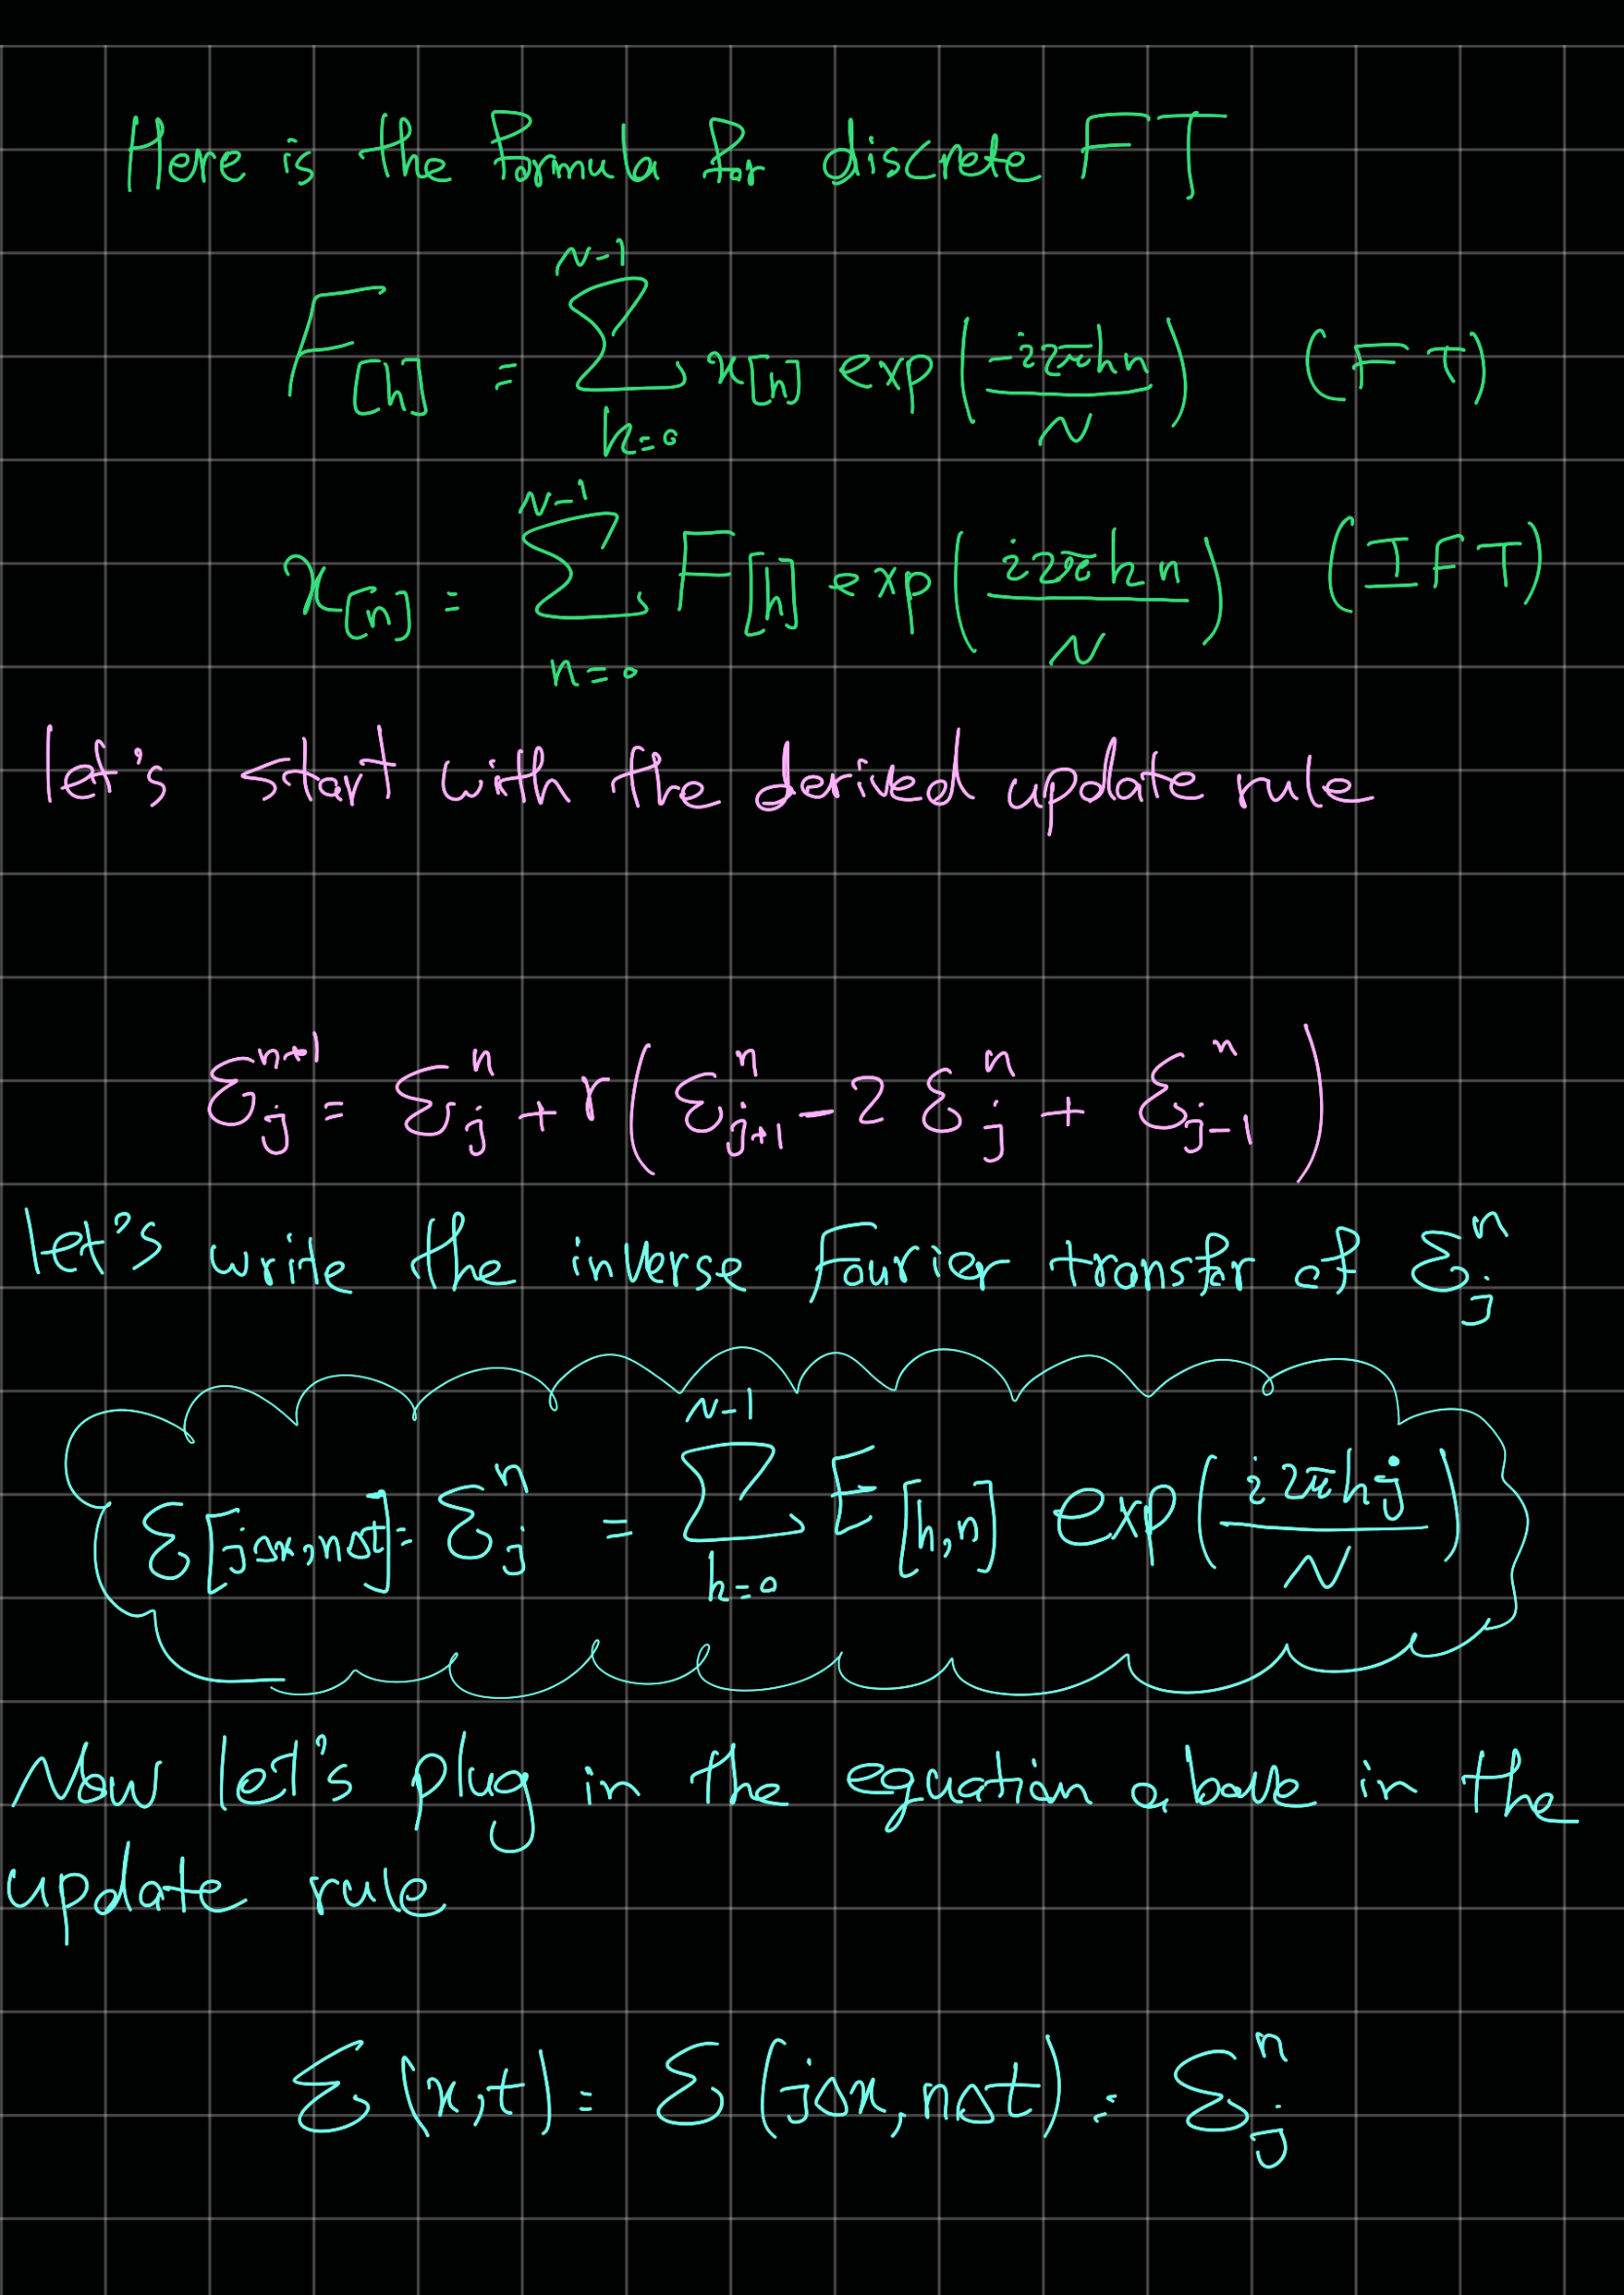

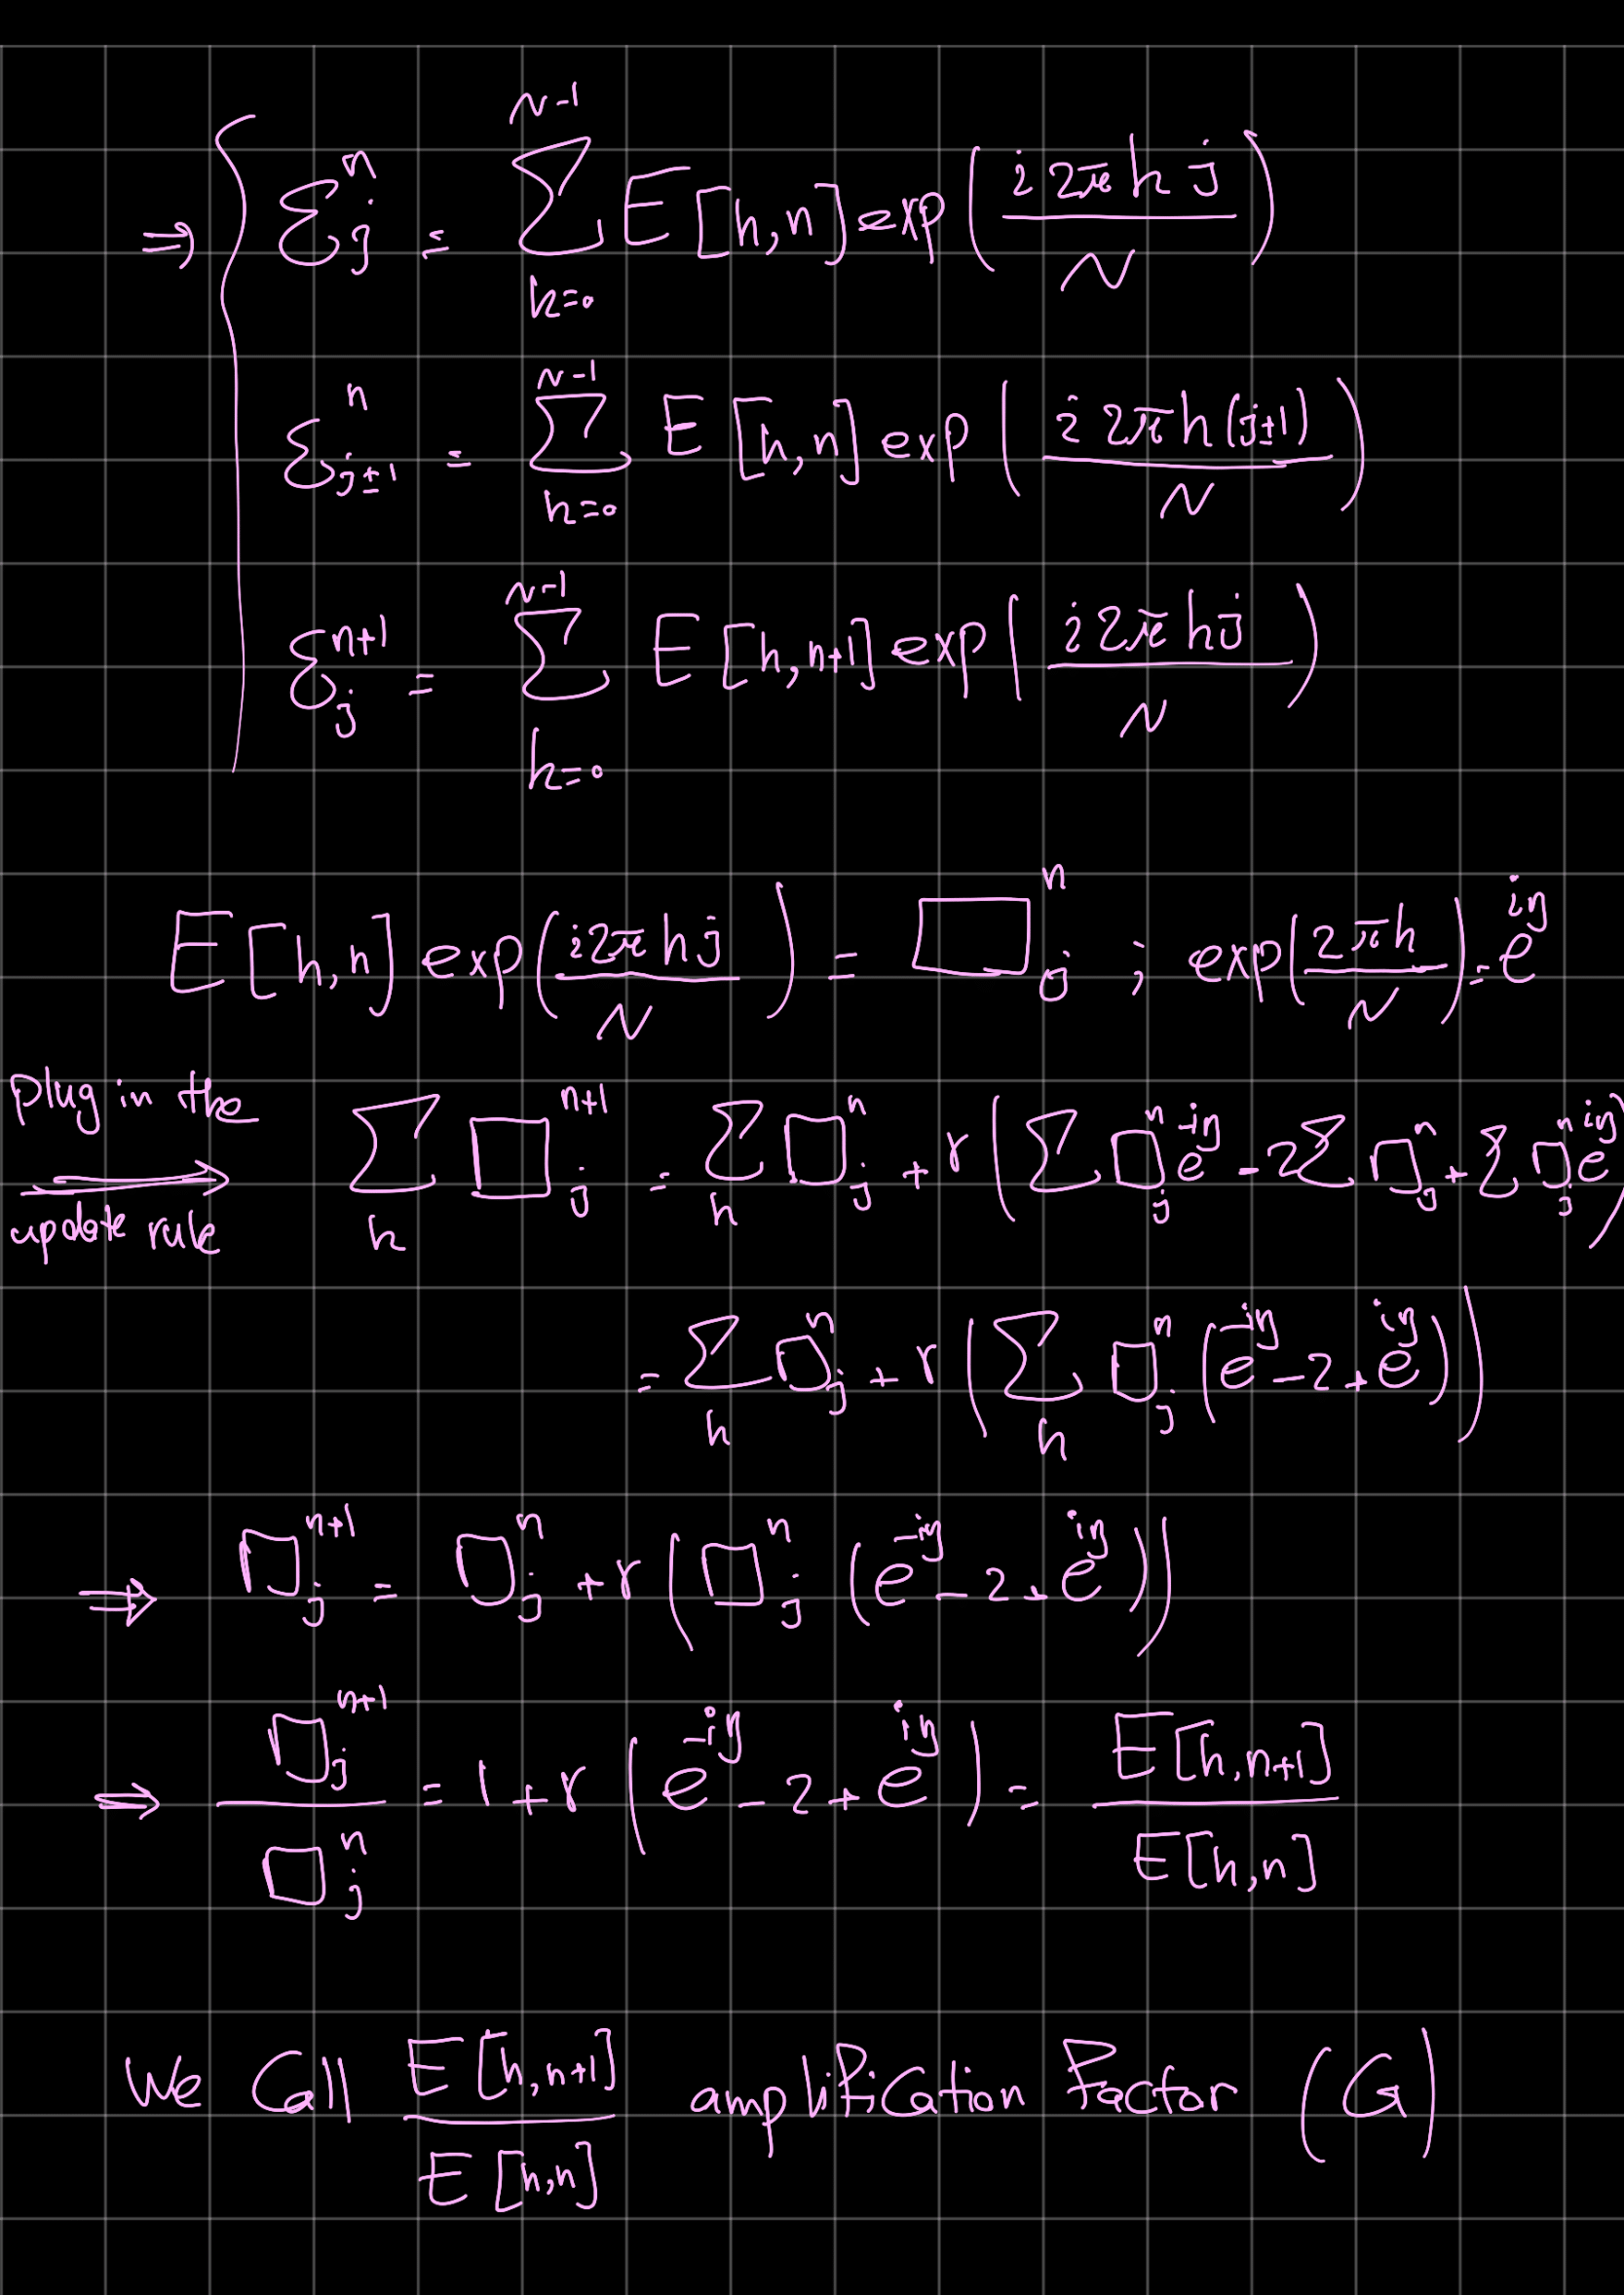

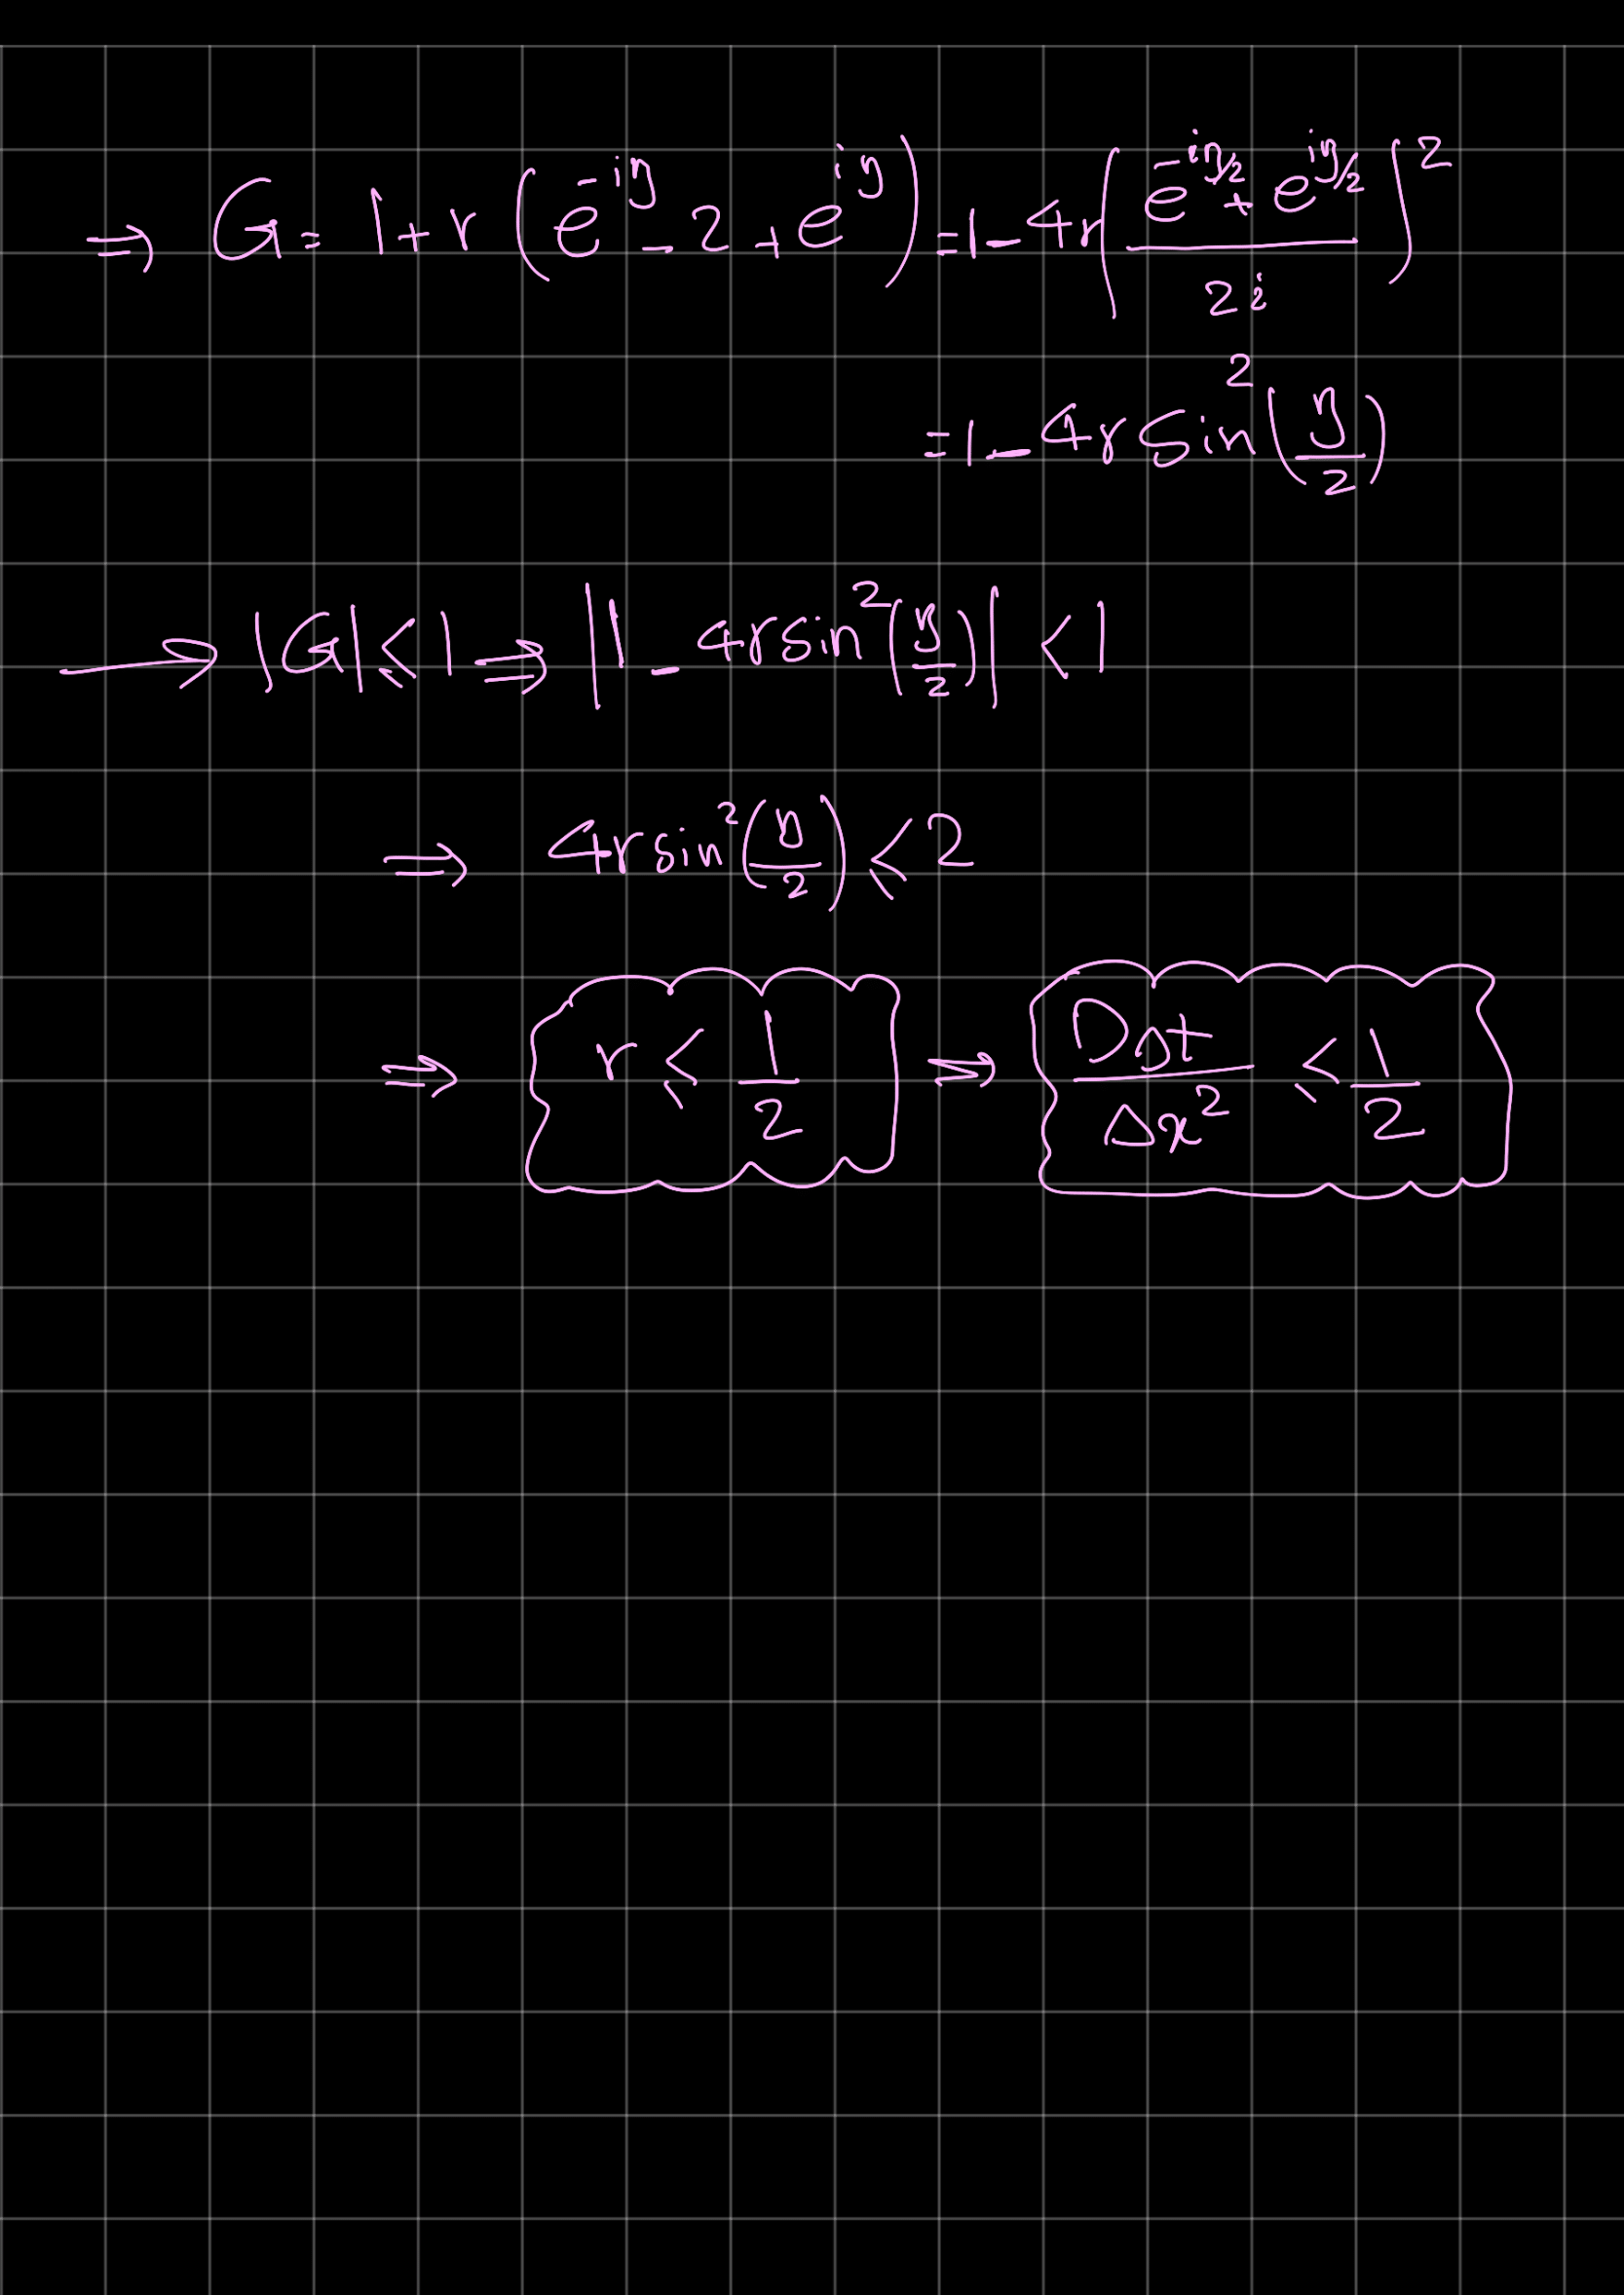

In [224]:
diag = np.arange(10)
n = diag.shape[0]
data = np.array([diag,diag,diag])

In [225]:
diags = np.array([0,1,-1])

In [20]:
Mat = spdiags([diag,diag,diag],[0,1,-1],n,n)
mat = Mat.toarray()

In [21]:
Mat

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 28 stored elements (3 diagonals) in DIAgonal format>

In [22]:
Mat.dot(diag)


array([  1,   5,  14,  29,  50,  77, 110, 149, 194, 145])

In [23]:
mat

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 3, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 4, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 5, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 6, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 7, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 8, 9],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 9]])

So ``` Mat.dot(vector) ``` do the multiplication for sparse matrix with the vector

In [139]:
D = 0.5
dt = 1e-4
dx = 1e-2

X_0 = 0
X_end = 1
tEnd = 0.1
M = int((X_end - X_0)/dx)
N = int(tEnd/dt)
X = np.linspace(X_0, X_end, M)
sigma = 0.02

F = np.ones(M)*np.exp((-(X-0.5)**2)/(2*(sigma)**2))
F[0] = 0
F[-1] = 0

FData = np.zeros((N,M))



<IPython.core.display.Javascript object>


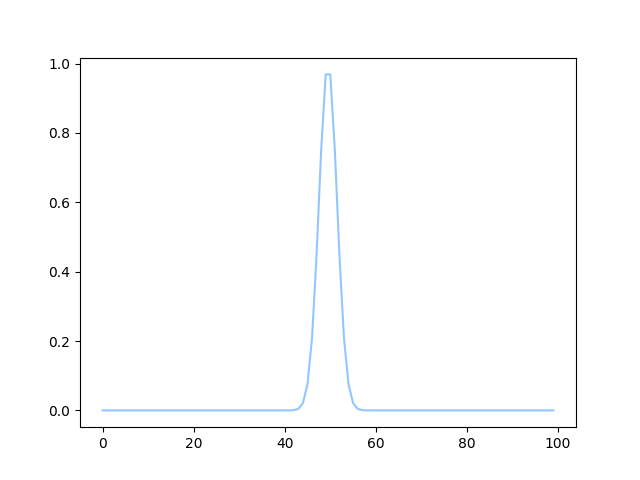

In [140]:
plt.plot(F)

In [141]:
Diag = np.ones(M)*(-2)
Diag[0] = 1
Diag[-1] = 1

upDiag = np.ones(M)
upDiag[1] = 0

lowDiag = np.ones(M)
lowDiag[-2] = 0

Mat = spdiags([lowDiag, Diag, upDiag],[-1,0,1],M,M)
mat = Mat.toarray()

I = scp.sparse.eye(M)

In [142]:
mat

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [143]:
for t in range(N):
    F = (0.5*Mat + I).dot(F)
    FData[t,:] = F

In [144]:
FData

array([[0.00000000e+000, 5.33851628e-126, 8.58996699e-121, ...,
        8.58996699e-121, 5.33851628e-126, 0.00000000e+000],
       [0.00000000e+000, 4.29498350e-121, 5.35493642e-116, ...,
        5.35493642e-116, 4.29498350e-121, 0.00000000e+000],
       [0.00000000e+000, 2.67746821e-116, 2.58665815e-111, ...,
        2.58665815e-111, 2.67746821e-116, 0.00000000e+000],
       ...,
       [0.00000000e+000, 1.81977556e-003, 3.63853061e-003, ...,
        3.63853061e-003, 1.81977556e-003, 0.00000000e+000],
       [0.00000000e+000, 1.81926530e-003, 3.63750698e-003, ...,
        3.63750698e-003, 1.81926530e-003, 0.00000000e+000],
       [0.00000000e+000, 1.81875349e-003, 3.63648017e-003, ...,
        3.63648017e-003, 1.81875349e-003, 0.00000000e+000]])

In [145]:
N

1000

<IPython.core.display.Javascript object>


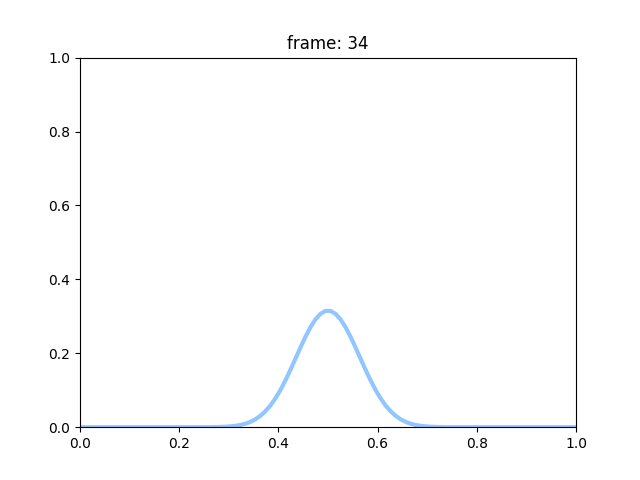

In [158]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    return line,
def animate(i):
    ydata = FData[i,:]
    xdata = np.linspace(0,1,ydata.shape[0])
    line.set_data(xdata, ydata)
    ax.set_title("frame: {}".format(i))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=150, interval=75, blit=True)




## Breaking the stability condition

In [217]:
D = 0.58
dt = 1e-4
dx = 1e-2
Coeff = D*dt/dx**2
print(Coeff)

X_0 = 0
X_end = 1
tEnd = 0.1
M = int((X_end - X_0)/dx)
N = int(tEnd/dt)
X = np.linspace(X_0, X_end, M)
sigma = 0.02

F = np.ones(M)*np.exp((-(X-0.5)**2)/(2*(sigma)**2))
F[0] = 0
F[-1] = 0

FData = np.zeros((N,M))



0.58


In [218]:
for t in range(N):
    F = (Coeff*Mat + I).dot(F)
    FData[t,:] = F

<IPython.core.display.Javascript object>


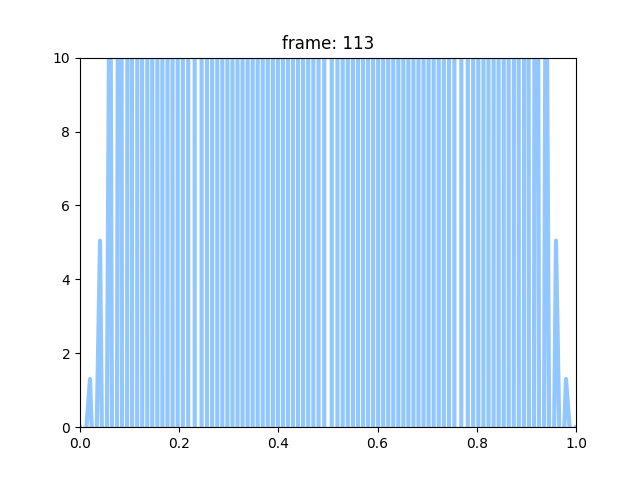

In [223]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    ax.set_xlim([0,1])
    ax.set_ylim([0,10])
    return line,
def animate(i):
    ydata = FData[i,:]
    xdata = np.linspace(0,1,ydata.shape[0])
    line.set_data(xdata, ydata)
    ax.set_title("frame: {}".format(i))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=150, blit=True)

